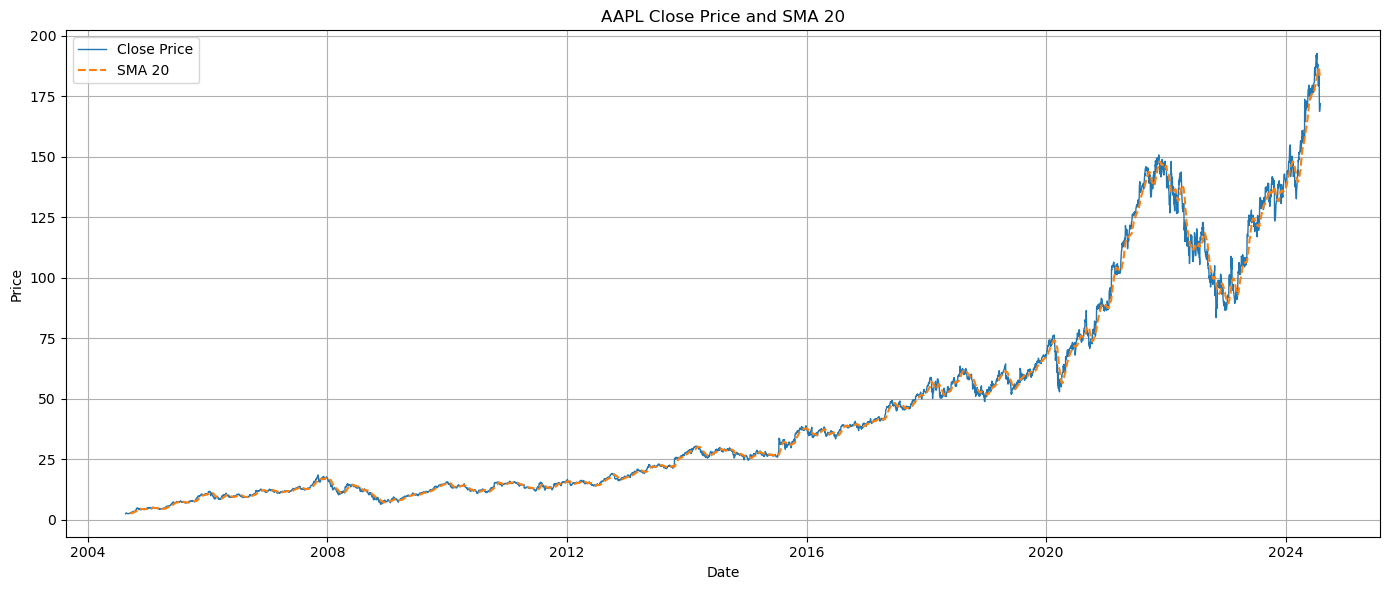

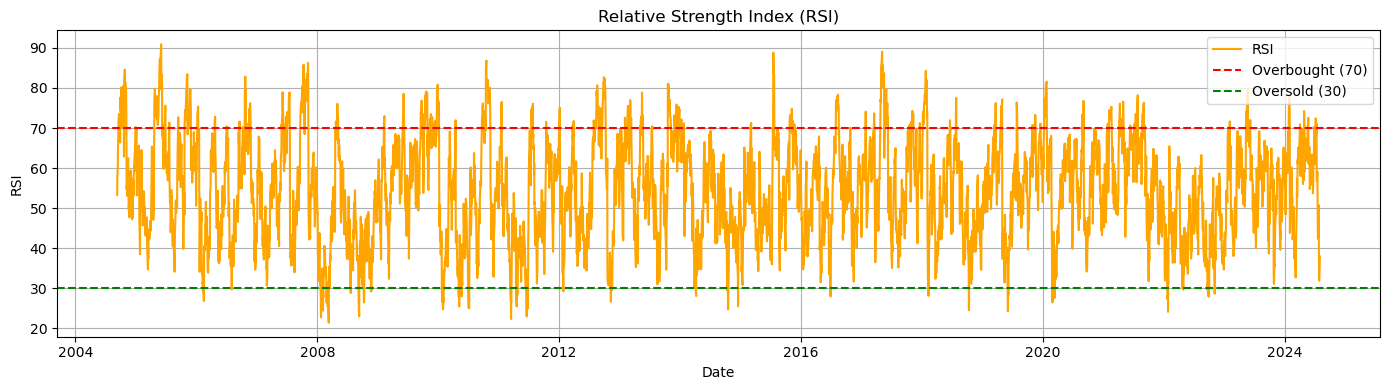

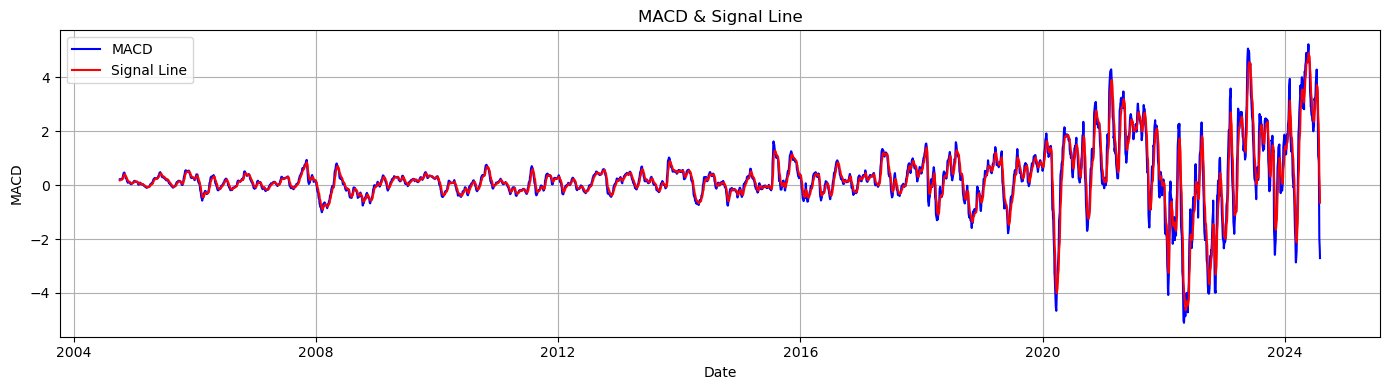

In [ ]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import talib
from datetime import datetime

# 2. Load CSV data
file_path = '../data/finance/GOOG_historical_data.csv'  # Adjust path as needed
df = pd.read_csv('../data/AAPL_historical_data.csv')

# 3. Convert 'Date' column to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# 4. Keep relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 5. Calculate technical indicators
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_signal'], _ = talib.MACD(df['Close'])

# 6. Plot: Close Price & SMA
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', linewidth=1)
plt.plot(df['SMA_20'], label='SMA 20', linestyle='--')
plt.title('AAPL Close Price and SMA 20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Plot: RSI
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Plot: MACD
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal Line', color='red')
plt.title('MACD & Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
